<a href="https://colab.research.google.com/github/Hamza1122/Pose_Estimation_Yolo_Points/blob/main/testing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


category = ['sami', 'sajid', 'amman', 'wajid', 'ahmed', 'shumail', 'steve', 'hannan']


In [48]:
# !unzip wajid.zip

In [49]:
# data=r"/content/steve/"

IMG_SIZE = 50

In [50]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy


In [51]:
def feature_extraction(training_data):
  X_test=[]
  y_test=[]

  for features, label in training_data:
    X_test.append(features)
    y_test.append(label)

  y_test=np.array(y_test)
  X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
  X_test=X_test.astype('float')
  X_test=X_test/ 255 
  

  

  return X_test,y_test



def pre_processing(pose_path,angles_path):
  df_angle = pd.read_csv(angles_path)
  df_angle = df_angle.fillna(0)
  df_test=pd.read_csv(pose_path) 
  df_angle['path'] = df_test['Image']
  df=pd.merge(df_test,df_angle, how='left', left_on='Image', right_on='path')   #merge both datasets and duplicates will be removed automatically  
  df=df.fillna(0)
  return df

In [52]:
training_data = []
temp_array=[]

def create_training_data(data,cate):
    for category in cate:
        
        path = os.path.join(data,category)
        class_num = cate.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                temp_array.append(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

    return training_data          

In [53]:

def convolutional_neural_network(dataset_path,pose_path,angles_path):
  data=r"/content/"+dataset_path+'/'
  cate =[dataset_path]

  training_data = create_training_data(data,cate)
  
  df =pre_processing(pose_path,angles_path)
  df=df.drop(['Image','Class','images','path'],axis=1)
  
  
  X_test,y_test =feature_extraction(training_data)
  
  return X_test,df


In [54]:
X_test,df = convolutional_neural_network('wajid','wajid_pose.csv','wajid_angle.csv')

min_max_scaler = preprocessing.MinMaxScaler()

df = min_max_scaler.fit_transform(df)

In [55]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()




loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [56]:
# loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [57]:
y_new = loaded_model.predict(([df,X_test]))

In [59]:
results = np.argmax(y_new,axis=1)
results

array([7, 7, 7, 7, 7, 0, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       3, 7, 7, 0, 0, 0, 0, 7, 7, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 5, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7,
       3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 5, 7, 7, 4, 7,
       7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 4])

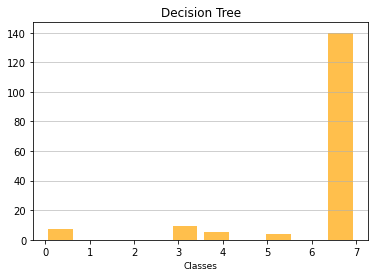

In [61]:
plt.hist(results,rwidth=0.8,color='orange',alpha=0.7)
plt.title('Decision Tree')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Classes',fontsize=9)
plt.show()
  